# Lab 1: A Simple Climate Model

## Overview 

In this lab you will use Python to develop a simple climate model for Earth. This lab is based on the [STELLA Simple Planetary Climate Model](https://www.e-education.psu.edu/earth103/node/790) developed at Penn State University. This climate model will calculate the temperature of Earth based on the amount of energy that is received, the amount of energy emitted, and the amount of thermal energy stored by the Earth. **Please carefully read through all the documentation about the model before you start writing any code. This lab is worth 70 points.** 

The components for the model are shown in the diagram below:

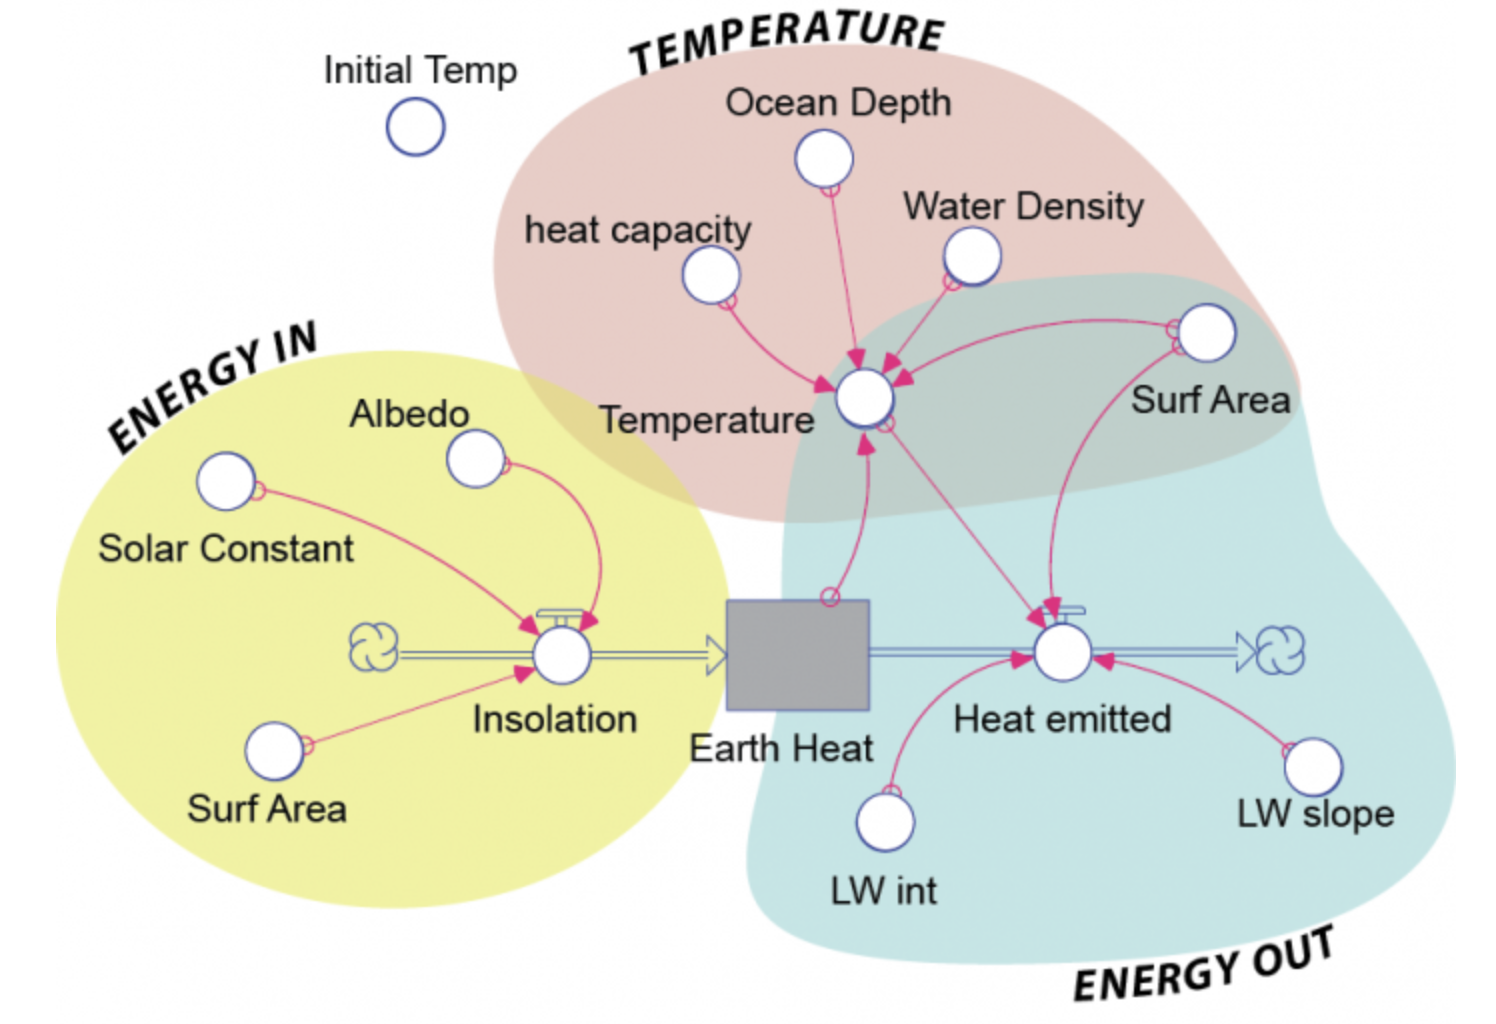

*Figure 1: A simple model of the Earth's climate system. Credit: [A Simple Planetary Climate Model](https://www.e-education.psu.edu/earth103/node/790), David Bice, Penn State University*

The diagram uses symbols to represent different model components:
- **Reservoir (shaded gray box):** Stores some quantity, such as thermal energy
- **Flow (valve symbol):** Adds to or subtracts from a reservoir 
- **Connector (red arrows):** Shows a link between different model components.
- **Converter (open circle):** Does a conversion or adds information to some other part of the model

### Modeling the Earth's climate system
The **Energy In** sector in yellow controls the amount of incoming solar radiation (insolation) absorbed by the Earth. The **Energy Out** sector in blue controls the amount infrared radiation (*i.e.,* thermal energy) emitted by the Earth. The **Temperature** sector in red determines the temperature of the Earth's surface based on the amount of thermal energy stored in the Earth's surface. 

The **Earth Heat** reservoir shown by the shaded gray box diagram represents the heat stored by the Earth's surface. In this model, we will assume that water will be the main material absorbing, storing, and releasing energy in the climate system. This is highly simplified, but still a reasonable assumption since approximately 70% of Earth is covered by the ocean.

### In this lab you will learn and practice the following skills:
- Developing a energy balance model for the Earth
- Writing loops and functions in Python
- Data visualization with Matplotlib


### To submit via Canvas

To foster a collaborative learning environment, you are encouraged to work in groups of 2-3, but each person must write and submit their own code, and individually answer all interpretation questions. All students must complete all problems - it is against the honor code to divide the problems up among different individuals.

- Prior to submitting your lab assignments on Canvas, please name your Notebook files using the following syntax: *LastName_FirstName_EV333_Lab1.ipynb.*
- Type you responses to the short-answer questions in this Notebook. Add a cell and select 'Markdown' instead of 'Code' from the drop down menu. Add **Answer:** and provide your written responses.
- Re-run all cells to ensure that the Notebook runs completely through without errors and that all figures are displayed.
- Compile the screenshots from all your model experiments in a word document and save it as a PDF.
- Upload your final Jupyter Notebook (.ipynb file) and PDF to Canvas

---

**<span style='color:Red'> Insert a cell below (`+`)</span>, select the Markdown cell option from the drop down menu, and type your responses to all the questions in the model components section.**

# Model components 
## Incoming solar radiation ($E_{in}$)


The **Energy In** sector (yellow in Figure 1) controls the amount of incoming solar radiation (insolation) absorbed by the Earth. The different model components and their units include:

- The solar constant (*S*, units: W/m$^2$)
- The cross-sectional area of the Earth ($A_x$, units: m$^2$), *i.e.* the area that faces the Sun. To visualize this, imagine the Sun shining on the Earth and the Earth casting a circular shadow on a screen behind it
- The Earth's albedo ($\alpha$), or the proportion of incident light that is reflected by the Earth's surface. This is a ratio between 0 and 1.

In our climate model, we will use a constant value of 1360 W/m$^2$ for the solar constant, *S*. 

To calculate $E_{in}$, the total amount of incoming energy absorbed by the Earth, multiple the solar constant, *S* by the cross-sectional area of the Earth, $A_x$. This is then multiplied by 1 - albedo (1 - $\alpha$). 

This is then multiplied by the cross-sectional area of the Earth — this is the area that faces the Sun — giving a result in Watts (which you should recall is a measure of energy flow and is equal to Joules per second). This is then multiplied by (1 – albedo) to give the total amount of energy absorbed by our planet. In equation form:

### $E_{in} = S * A_x * (1 - \alpha)$

**[0.5pt] Question:** Based on the equation above, what are the units of $E_{in}$? Add your answers to a Markdown cell.  

---

## Outgoing thermal radiation ($E_{out}$)

The **Energy Out** sector (blue in Figure 1) controls the amount of energy emitted by the Earth. The outgoing energy is thermal radiation (heat). Earth's outgoing energy is determined using the Stefan-Boltzmann Law. In equation form:

### $E_{out} = A * \epsilon * \sigma * T^4$

Where $A$ is the surface area of the Earth (units: m$^2$), $\epsilon$ is the emissivity (unitless), $\sigma$ is the Stefan-Boltzmann constant (5.670374419 x 10$^{-8}$ W/m$^2$ K$^4$), and T is the temperature of the Earth in Kelvin (K). Here, emissivity ($\epsilon$) is a measure of the efficiency of the atmosphere's absorption of any infrared radiation incident upon it. This value can range from 0 to 1. High emissivity means that the planet efficiently gets rid of heat. A strong greenhouse would lead to low emissivity.

**[0.5pt] Question:** Based on the equation above, what are the units of $E_{out}$? Add your answers to a Markdown cell.  

---

## Temperature (T)

The temperature sector (red in Figure 1) determines the temperature of the Earth's surface based on the amount of thermal energy (heat) stored in the Earth's surface. 

As stated in the lab overview, in this model, we will assume that water will be the main material absorbing, storing, and releasing energy in the climate system. The amount of energy stored is related to:

- The heat capacity of water ($C_p$, units: J/kg K), or the amount of energy it takes to heat a kg of water by 1 Kelvin.
- The density of water ($\rho$, units: kg/m$^3$).
- The surface area of Earth ($A$, units: m$^2$). In this model, the Earth is assumed to be an "Aquaplanet" entirely covered by water).
- The depth of the ocean mixed layer ($d$, units: m). This is the part of the ocean involved in short-term climate change.

To determine the temperature in an object given the amount of thermal energy contained in that object, the thermal energy must be dividued by the product of the mass times the heat capacity of the object. In equation form (with units):

### $T = \frac{E_{sfc}[J]}{A[m^2] * d[m] * \rho [kg/m^3] * C_p[J/kg K]}$

$E_{sfc}$ is the thermal energy stored in Earth's surface, $A$ is the surface area of the Earth, $d$ is the depth of the ocean mixed layer, $\rho$ is the density of sea water, and $C_p$ is the heat capacity of water.

The four terms in the enominator will be set at the beginning of the model run and will remain constant throughout the entire run. These terms can be changed from one run to the next. 

**[0.5pt] Question:** Check the units! Based on the equation above, what are the units of $T$? Add your answers to a Markdown cell.  

---

## Other model components

The initial temperature of the Earth determines how much thermal energy is stored in the Earth at the beginning of the model run. This value can be changed from one run to the next.

The climate model also contains some converters that divide the energy received and the energy emitted by the surface area of the Earth to give a measure of the intensity of energy flow, of the flux, in terms of W/m$^2$, a common form for expressing energy flows in climate science.

--- 

### [4pts] Question: Sketch & describe the model
Please sketch by hand **your own** diagram of this climate model *as you understand it*. This should **not** be an exact replication of the model schematic above. You can keep it simple!
- Label all the model components & the fluxes
- Add the relevant equations to the diagram where appropriate
- Make a list of all the constants you need to define and their values/units
- Add any other notes you find helpful - Consulting your energy balance class notes may be helpful.

***The objective is to make sure you thoroughly understand the model before writing a single line of code. Investing the time now will save you a lot of time in the long run.*** 

<span style='color:Red'> Scan or take a photo of your diagram and include it in your final lab write-up.

# Developing the climate model

Now that you have reviewed all the model components, you are ready to develop a computer program that will calculate the temperature of the Earth's surface based on the inflows of energy, outflows of energy, and the energy stored in the Earth's surface. 

Before you begin, import the Python Math and NumPy packages and the Matplotlib PyPlot module. You will need all three to complete this lab assignment.

In [1]:
# import the Python packages needed for this lab
import math
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Define constants 

It is helpful to use descriptive variable names for all the constants in this climate model. For example, we will use a constant value of 1360 W/m$^2$ for the solar constant. Other constants include, the Stefan-Boltzmann constant, the density of water, and the heat capacity of water.

**Use the following variable names and values for the constants in your climate model:**
- `solar_constant`: for the Solar Constant (1360 W/m$^2$)
- `boltzmann_constant`: for the Stefan-Boltzmann constant (5.670374419 x 10$^{-8}$ W/m$^2$ K$^4$)
- `density_of_water`: for the density of water (1000 kg/m$^3$)
- `heat_capacity`: for the heat capacity of water (4184 J/kg K)

**<span style='color:Red'> [1pt] Insert a cell below using the `+` and define the 4 constants listed above.</span>** It will be helpful to provide the units in the comments `#`.

## Step 2: Calculate the cross-sectional area and surface area of Earth

The equations in this climate model include the cross-sectional area ($\pi r^2$) and surface area of the Earth ($4 \pi r^2$), where r is the radius of the Earth.

**<span style='color:Red'> [2pts] Insert a cell below `+` and calculate the cross-sectional area and surface area of Earth.</span>**

The Python math module (imported above) provides a value for $\pi$. To define pi as a variable use: `pi = math.pi`. Define a variable `radius_earth_meters` that is the radius of the Earth in meters (6,371,000 m)

Define a variable `cross_area_earth` that calculates the cross-sectional area of the Earth in square meters (m$^2$). Define a variable called `surface_area_earth` that calculates the surface area of the Earth.

## Step 3: Set the initial conditions for the model

Initialize the climate model with values for the Earth's emissivity, the Earth's initial temperature, and the depth of the ocean mixed layer. These values can be changed before the start of each run. 

For the first run:
- Initial temperature (`T0_celsius`) = 0°C
- Emissivity (`emissivity`) = 1.0 (this will not change over time)
- Albedo (`albedo`) = 0.3 (this will not change over time)
- Ocean depth (`depth_ocean`) = 100 m (this will not change over time)

**<span style='color:Red'> [1pts] Insert a cell below using the `+` and set the initial conditions for the model.</span> The variable names are provided in the list above.**

**[1pt] Question:** What does emissivity = 1 physically represent? What about emissivity = 0? <span style='color:Red'>Add a Markdown cell below and type your answer.

## Step 4: Calculate the initial incoming solar energy, $E_{in}$

**<span style='color:Red'> [2pts] Insert a cell below (`+`) </span>**. Define a variable `Ein` and write an equation that calculates the flux of incoming solar energy to Earth. Print the value of `Ein` and its units: `print('Ein:', Ein, '<modify this with the units>')` 

## Step 5: Calculate the initial outgoing energy, $E_{out}$

**<span style='color:Red'> [5pts] Insert a cell below (`+`) </span>**. Write a function called `Eout` that will calculate $E_{out}$. The input to the function should be temperature, `T` in $^{\circ}$C. We are writing a function because this calculation will be repreatedly performed when running the climate model. 

*Hint 1: You wrote a function in Lab 1. Please review your lab if you do not remember the syntax.*

*Hint 2: The input to the function should be temperature in $^{\circ}$C. What temperature unit is needed for the $E_{out}$ equation?*

**<span style='color:Red'> [1pt] Insert a cell below (`+`) </span>**. Now use your function to calculate the flux of outgoing energy for the Earth at the initial temperature. Define this as a variable called `E0_out`, where the `0` represents initial conditions. Print the initial Eout value and its units: `print('Initial Eout:', E0_out, '<add units here>')`

## Step 6: Set the time step (*i.e.,* how often calculations are peformed)
**<span style='color:Red'> [1pts] Insert a cell below (`+`) </span>**. Define the following variables for running the model:
 - Number of years to run the model (years): `numYears`
 - Time step (years): `deltaT`
 - Seconds per year: `seconds_per_year`
 
Let's start by running the model for 30 years with a time step of 0.1 years. Calculate the number of seconds per year as `seconds_per_year`.

Now calculate the number of time steps to run the model. This code is provided for you. **Please make sure you understand the calculation before proceeding.**

In [9]:
# calculate the number of timesteps to run the model
numTimeSteps = math.floor(numYears/deltaT) + 1

print('The model will run for', numYears, 'years with a time step of', deltaT, 'years. This will be', numTimeSteps, 'time steps.')

The model will run for 30 years with a time step of 0.1 years. This will be 301 time steps.


## Step 7: Solve for the initial heat stored in the Earth's surface ("Earth heat") `E0`

The **Earth Heat** reservoir shown by the shaded gray box diagram in the Lab overview represents the heat stored by the Earth's surface. In this model, we will assume that water will be the main material absorbing, storing, and releasing energy in the climate system. This is highly simplified, but still a reasonable assumption since approximately 70% of Earth is covered by the ocean.

**<span style='color:Red'> [2pts] Insert a cell below (`+`) </span>**. Define a variable `E0` and calculate the initial heat stored in the Earth's surface. Print this value and the units: `print('Initial Earth heat:', str(E0), '<update with the units>')`

**Question:** What are the units?

## Step 8: Define a function `calc_temp` that takes the current energy flux and calculates the temperature of the Earth.

**<span style='color:Red'> [5] Insert a cell below (`+`) </span>**. Define a function called `calc_temp` that will calculate the temperature of the Earth. The input to the function should be `current_energy_flux`. In the function, you will need to use the thermal energy stored by the Earth and solve for temperature. We are writing a function because this calculation will be repreatedly performed when running the climate model. *Hint: Make sure temperature is in Kelvin.*

In [12]:
# check that calc_temp is working by substituting E0 in
calc_temp(E0)

0.0

As the model runs it will store the time (`time`) and temperature (`T_Earth`) of the Earth for each timestep. Use NumPy to initialize arrays for `time` and `T_Earth` This step is done for you in the cell below. The initial time step is 0. The initial temperature value is `T0_celsius`.

The cell below also defines arrays for storing Ein and Eout values for the time series (i.e., how the energy flows change over time as the model runs). These variables are defined as `Ein_ts` and `Eout_ts`, respectively (ts = time series).

In [13]:
# initial arrays for time and T_Earth values
time = np.array([0])
T_Earth = np.array([T0_celsius])

# initial arrays for Ein and Eout values (ts = time series)
Ein_ts = np.array([Ein])
Eout_ts = np.array([E0_out])

print('Initial Eout:', E0_out)

Initial Eout: 1.6100584043605366e+17


# Develop the Climate Model

Now you are ready to develop the climate model! This involves writing a for loop that iteratively calculates the temperature of the Earth for each time step. You defined how many years to run the model above (e.g., for 30 years).

When developing a model it is helpful to systematically write out all the steps in words before turning it into code. This is often referred to as writing "pseudocode."


**[5pts] Before you begin coding the model:**
- Briefly describe the model in words, consulting the sketch you made earlier
- Provide a detailed list of the steps for each interation (time step) of the model. List the variables and calculations you need. 
- Think about and answer the following questions: Why do we need to use a loop? Why do we define functions when programming? Which variables and constants do you already have defined? Which calculations did you already write a function for?  

You may write your pseudocode in a markdown cell (preferred) or in a separate word document. **Only once you have your pseudocode, should you proceed to the next step.**

---

**<span style='color:Red'> [15pts] Insert a cell below (`+`) </span> and add your code for the model.** Writing loops can be a bit tricky so an outline is provided below. You will need to fill in the code. 

*Hint: This will involve using the two functions you defined earlier in the lab.*

```
# initialize the current energy and temperature as the initial temperature and E0 values
current_energy = E0
current_temp = T0_celsius

# write a loop, start the iterator at 1 because the first time step is defined
for i in range(1,numTimeSteps):
    
    # calculate E_out for the current time step
    current_Eout = ...add your code here...
    
    # calculate current_energy (thermal energy stored by the Earth) for the current time step
    current_energy = ...add your code here...
    
    # calculate current_temp based on current_energy for the current time step
    current_temp = ...add your code here...
    
    # print the current thermal energy and the Earth's current temperature
    print(f"step {i}: E {current_energy} T {current_temp}")
    
    # append the current_temp to the T_Earth array (this is done for you)
    T_Earth = np.append(T_Earth, [current_temp])

    # append the time step to the time array
    time = np.append(time, i)

    # append the currrent Ein and Eout
    Ein_ts = ...add your code here...
    Eout_ts = ...add your code here...

# convert the time array into units of years
time = ...add your code here...

```

# Plot the results

Let's plot the results! 

**<span style='color:Red'> [2pts] Insert a cell below (`+`) </span>.** 
Generate a graph of Earth's temperature versus time. Include a title, and x and y-axes labels (with units). Display the x-axis values in units of years. Save the figure as `Lab1_ClimateModel_Temperature.png`.

```
# plot temperature of the Earth vs. time for the climate model simulation
fig, ax = plt.subplots()

# plot temperature of the Earth vs. time
...add your plotting code here...

# save the figure
fig.savefig('Lab1_ClimateModel_Temperature.png', facecolor = 'white', transparent = False, bbox_inches ='tight')
```

**[1.5pts] Question:** What is your final temperature value? How do you interpret the temperature vs. time graph? Do your results seem reasonable based on how you initialized the model (why or why not)? <span style='color:Red'> Add a Markdown cell and explain your answer.</span>

**<span style='color:Red'>[2pts] Insert a cell below (`+`) </span>.** Generate a graph that shows $E_{in}$ versus time and $E_{out}$ versus time on the same figure. Prior to plotting, convert the Ein and Eout *time series* to the energy flux *per unit area*.  

Set the $E_{in}$ line color to orange and the $E_{out}$ line color to blue. Add a title, x and y axes labels (with units). Add a legend to differentiate the two curves. ([documentation is provided here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)). Save the figure as `Lab1_ClimateModel_Ein_Eout.png`.

**[2pts] Question:** Describe in words the temperature and energy flux figures. Please provide enough detail to demonstrate that you understand how the model works. Are these figures what you expect to see? 

**<span style='color:Red'> [14pts] Insert a cell below (`+`) </span>, select Markdown, and provide your responses to the question above.** Each question is worth 2 pts. 

*Unless otherwise noted, all the experiments should be compared to a "control" simulation with an initial temperature of 0${\circ}$C, and albedo of 0.3, emissivity of 1.0, and a 100 m ocean depth.* 

*To more readily compare your results, please use the same x and y ranges for all graphs.* 


## Run additional model experiments and synthesize the results

1. How will changing the initial temperature affect the model results? We saw that when we started with an initial temperature (remember that this is the global average temperature) of 0${\circ}$C, the model ended up with some final temperature. What will happen if you start with a different initial temperature? Change the initial temperature to 15${\circ}$C, then run the model and record the ending temperature after 30 years. Screenshot your temperature and energy flux figures and include them in your lab write-up.

2. What will happen to our climate model if we change the albedo? Recall that a low albedo represents a dark-colored planet that absorbs lots of solar energy, while a higher albedo (up to a value of 1.0) represents a light-colored planet that reflects lots of solar energy. Set the initial temperature back to 0${\circ}$C. Change the albedo to 0.5, then run the model and record the ending temperature. Then change the albedo to 0.1, then run the model and record the ending temperature. Screenshot your temperature and energy flux figures and include them in your lab write-up.

3. Set the initial temperature to 0${\circ}$C and the albedo back to 0.3. Run the model again, but change the emissivity. How will changing the emissivity change your results? Run the model to find out. Change the emissivity to 0.3, then run the model and find the ending temperature. Change the emissivity to the more realistic value of 0.6147 for the Earth. What happens when emissivity is high? What about when it is low? Or somewhere in the middle? How do your results change? Why does this occur? Please describe. Screenshot your temperature and energy flux figures and include them in your lab write-up.

4. In our control simulation, the ocean depth is 100 m — this means that only the upper 100 m of the oceans are involved in exchanging heat with the atmosphere on a timescale of a few decades. If the oceans were mixing faster, this depth would be greater, and if they were mixing more slowly, the depth would be less. Run the control simulation again. Then change the ocean depth to 50 m and run the model. How do your results change? Please describe any differences in the temperature and timing of the changes. Screenshot your temperature and energy flux figures and include them in your lab write-up.

5. The solar constant is not really constant for any length of time. For instance, it was only 70% as bright early in Earth’s history, and it undergoes smaller, more rapid fluctuations (and much smaller) in association with the 11-year sunspot cycle. Let’s see how the temperature of the planet reacts to changes in the solar constant. First, set the model up with the following parameters:
- Initial Temp = 15$^{\circ}$C
- Albedo = 0.3
- Emissivity = 0.6147
- Ocean Depth = 100 m
- Solar constant = 1360 W/m$^2$ 

Then set the solar constant to 70% of 1360 W/m$^2$ (keeping all other model parameters the same). Record the peak temperature and describe the figures. Screenshot your temperature and energy flux figures and include them in your lab write-up.

6. Design your own experiment! Set your own parameters, run the model, and describe what happens.

7. What are some of the simplifying assumptions we made in this model? 

**Add your responses to all these questions in a Markdown cell.** Please save your figures and/or take screenshots to compare the results for the different experiments.

### Congratulations! You completed Lab 1. 

1. Set all model parameters back to the control values
2. Re-run the whole Notebook and check there are no errors
3. Compile the screenshots from your model experiments in a word document and save it as a PDF
4. Submit your Jupyter Notebook (LastName_FirstName_EV333_Lab1.ipynb) and PDF with the figures on Canvas 